# Linear Regression 
## Kate Kenny 
### CS 0451

Source code: https://github.com/kate-kenny/kate-kenny.github.io/blob/main/posts/blog4/linear_regression.py

In this blog, we will be implementing linear regression in two ways. The first is an exact, analytical implementation of least-sqaures linear regression and the second is a gradient descent implementation. 

The loss function for this empirical risk minimization problem is defined as follows. 

$L(\mathbf{w}) = ||\mathbf{Xw - y}||^2_2 $

To start, we want to take the gradient of $L(\mathbf{w})$ with respect to $\mathbf{\hat{w}}$. 

$ \nabla L(\mathbf{w}) = 2\mathbf{X^T (Xw - y)}$

From here, we will implement both of our fit methods, test them, and then perform some experiements using the linear regression model. 

## Demo
### Generate and Plot Data

This initial example is p=1 for visualization purposes. Later in this post we will experiment with p values of different sizes. 

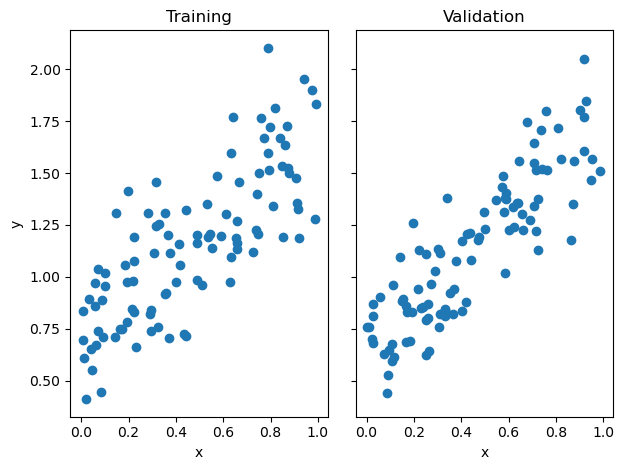

In [155]:
import numpy as np
from matplotlib import pyplot as plt

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

#generate data 
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()


### Test Fit Methods
Let's use this data to test both our analytical and gradient fit methods. We will show that both of our fit methods result in the same values for the prediction vertor $\mathbf{w}$. The score on the training data and the validation data is calculated using the coefficient of determination, referred to as $c$. 

$ c = 1 - \frac{\sum_{i=1}^{n}{(\hat{y_i} - y_i)^2}}{\sum_{i=1}^{n}{(\bar{y} - y_i)^2} $

Training score = 0.604
Validation score = 0.7412
[0.94220381 0.72060616]
[0.94211113 0.72065255]


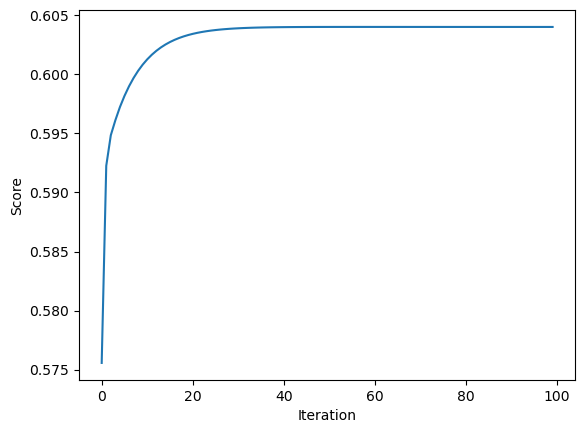

In [159]:
from linear_regression import LinearRegression


LR = LinearRegression()
LR.fit_analytical(pad(X_train), y_train)

print(f"Training score = {LR.score(pad(X_train), y_train).round(4)}")
print(f"Validation score = {LR.score(pad(X_val), y_val).round(4)}")

LR2 = LinearRegression()
LR2.fit_gradient(pad(X_train), y_train, alpha = .01, max_iter = 100)

print(LR.w)
print(LR2.w)

plt.plot(LR2.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")

### Experiments

The first experiment we are going to perform is allowing p_features, the number of features, to increase while the number of training points, n_train, remains the same. 

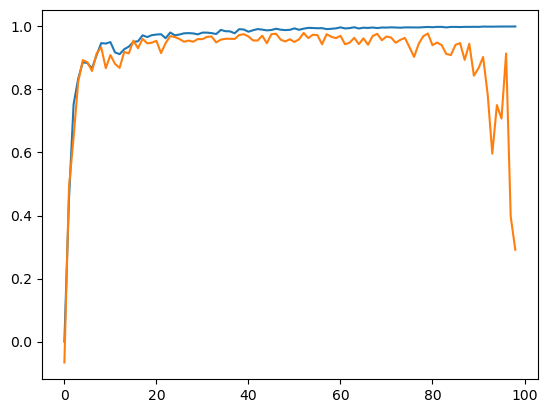

In [177]:
LR = LinearRegression()

n_train = 100
score_training = []
score_val = []

for i in range(n_train - 1):
    n_val = 100
    p_features = i
    noise = 0.2
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    LR.fit_analytical(pad(X_train), y_train)
    score_training.append(LR.score(pad(X_train), y_train).round(4))
    score_val.append(LR.score(pad(X_val), y_val).round(4))
    
plt.plot(score_training)
plt.plot(score_val)


Here we see both scores increasing at first but the score val beginning to fluctuate pretty widely once we get past around 65 features. 

## Lasso Regularization 

Next, we will implement Lasso Regularization using the SciKit Learn implementation. 

In [176]:
from sklearn.linear_model import Lasso 
L = Lasso(alpha = .001)

p_features = n_train - 1
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L.fit(X_train, y_train)

L.score(X_val, y_val)


0.7432441465308909

Let's repeat the experiment above that we did for Linear Regression with LASSO. 

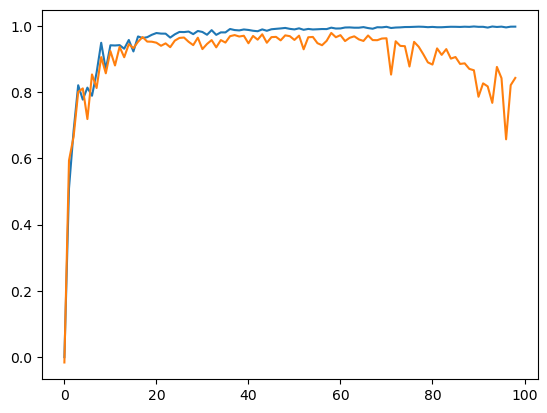

In [179]:
n_train = 100
score_training = []
score_val = []

for i in range(n_train - 1):
    n_val = 100
    p_features = i
    noise = 0.2
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    L.fit(pad(X_train), y_train)
    score_training.append(L.score(pad(X_train), y_train).round(4))
    score_val.append(L.score(pad(X_val), y_val).round(4))
    
plt.plot(score_training)
plt.plot(score_val)


There are somewhat similar results in this LASSO experiment as we saw for Linear Regression however the variation of the validation score is much smaller. So overall the validation score seems to be higher with LASSO than linear regression. 